In [3]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [4]:
assigned_order = pd.read_csv('../data/Assigned_orders.csv')
completed_order = pd.read_csv('../data/Completed_orders.csv')
courier_debt = pd.read_csv('../data/Courier_debt.csv')

In [5]:
courier_debt['rider_id'] = courier_debt['rider_id'].str.replace('id', 'id_')

In [6]:
courier_debt['first_online_date'] = pd.to_datetime(courier_debt['first_online_date'])
courier_debt['last_online_date'] = pd.to_datetime(courier_debt['last_online_date'], format='%Y%m%d')
courier_debt.head()

,rider_id,first_online_date,vehicle_type,last_online_date,debt_2022-10,debt_2022-11,debt_2022-12,debt_2023-01,debt_2023-02,debt_2023-03
0,id_5764607523772434582,2020-08-08,bicycles,2023-03-01,-405.01,-412.28,-936.76,-1020.68,-593.89,-1088.69
1,id_5764607523789211641,2019-12-26,bicycles,2023-01-09,-486.95,-486.95,-486.95,-486.95,-456.50,-456.50
2,id_5764607523910846566,2019-09-28,motorcycles,2023-02-10,0.00,0.00,-196.31,-196.31,-196.31,-340.43
3,id_5764607524099591948,2019-11-04,bicycles,2022-12-06,-801.96,-541.49,-577.76,-254.77,-254.77,-254.77
4,id_5764607524409968722,2019-10-13,bicycles,2022-11-08,-583.36,0.00,0.00,0.00,0.00,0.00


In [7]:
assigned_order.columns

Index(['rider_id', 'year_month', 'pay_type_processed', 'assigned', 'rejected'], dtype='object')

In [8]:
completed_order.columns

Index(['rider_id', 'year_month', 'pay_type_processed',
       'total_completed_orders_count'],
      dtype='object')

In [9]:
courier_debt.columns

Index(['rider_id', 'first_online_date', 'vehicle_type', 'last_online_date',
       'debt_2022-10', 'debt_2022-11', 'debt_2022-12', 'debt_2023-01',
       'debt_2023-02', 'debt_2023-03'],
      dtype='object')

In [10]:
courier_debt['rider_id'].nunique()

50202

In [11]:
completed_order['rider_id'].nunique()

37386

In [12]:
assigned_order['rider_id'].nunique()

42844

In [13]:
sqldf(''' SELECT distinct rider_id FROM assigned_order WHERE rider_id not in (SELECT distinct rider_id FROM assigned_order)''')

,rider_id


Hemos validado que toda la tabla de órdenes completadas se encuentre dentro de órdenes asignadas

In [14]:
sqldf(''' SELECT * FROM assigned_order WHERE rider_id not in (SELECT rider_id FROM courier_debt) order by pay_type_processed desc ''')

,rider_id,year_month,pay_type_processed,assigned,rejected
0,id_5764642082471806385,2023-02,PPB,1,1
1,id_5764636073443459204,2023-02,Card,7,7
2,id_5764639444808241093,2023-01,Card,1,0
3,id_5764639925920073051,2023-02,Card,7,7
4,id_5764639995805565220,2023-02,Card,9,9
...,...,...,...,...,...
106,id_5764642572416844553,2023-02,Card,1,1
107,id_5764642606252296460,2023-02,Card,26,26
108,id_5764642644797949747,2023-02,Card,66,63
109,id_5764642705309174155,2023-02,Card,12,12


In [15]:
sqldf(''' SELECT * FROM courier_debt WHERE rider_id not in (SELECT rider_id FROM assigned_order)  ''')

,rider_id,first_online_date,vehicle_type,last_online_date,debt_2022-10,debt_2022-11,debt_2022-12,debt_2023-01,debt_2023-02,debt_2023-03
0,id_5764607526632949948,2019-10-04 00:00:00.000000,bicycles,2022-09-10 00:00:00.000000,-904.81,-904.81,-904.81,-904.81,-904.81,-904.81
1,id_5764607526800722948,2019-10-12 00:00:00.000000,bicycles,2022-10-30 00:00:00.000000,0.00,-207.48,-207.48,-207.48,-207.48,-207.48
2,id_5764607529464106511,2020-05-18 00:00:00.000000,bicycles,2022-09-22 00:00:00.000000,-847.71,-847.71,-847.71,-847.71,-847.71,-847.71
3,id_5764607530047114589,2019-10-04 00:00:00.000000,bicycles,2022-09-15 00:00:00.000000,-1018.41,-1018.41,-1018.41,-1018.41,-1018.41,-1018.41
4,id_5764607531234101480,2019-10-09 00:00:00.000000,motorcycles,2022-09-29 00:00:00.000000,-1115.95,-1115.95,-1115.95,-1115.95,-1115.95,-1115.95
...,...,...,...,...,...,...,...,...,...,...
7462,id_5764642764721488430,2023-03-01 00:00:00.000000,motorcycles,2023-03-01 00:00:00.000000,0.00,0.00,0.00,0.00,0.00,0.00
7463,id_5764642812607856931,2023-02-28 00:00:00.000000,motorcycles,2023-03-01 00:00:00.000000,0.00,0.00,0.00,0.00,0.00,0.00
7464,id_5764642814579180164,2023-03-01 00:00:00.000000,motorcycles,2023-03-01 00:00:00.000000,0.00,0.00,0.00,0.00,0.00,0.00
7465,id_5764642877946725055,2023-03-01 00:00:00.000000,motorcycles,2023-03-01 00:00:00.000000,0.00,0.00,0.00,0.00,0.00,0.00


In [16]:
completed_order[completed_order['rider_id']=='id_5764639925920073051']

,rider_id,year_month,pay_type_processed,total_completed_orders_count


In [17]:
courier_debt[courier_debt['rider_id']=='id_5764607529464106511']

,rider_id,first_online_date,vehicle_type,last_online_date,debt_2022-10,debt_2022-11,debt_2022-12,debt_2023-01,debt_2023-02,debt_2023-03
26,id_5764607529464106511,2020-05-18,bicycles,2022-09-22,-847.71,-847.71,-847.71,-847.71,-847.71,-847.71


In [18]:
courier_debt[courier_debt['debt_2022-10']==0]

,rider_id,first_online_date,vehicle_type,last_online_date,debt_2022-10,debt_2022-11,debt_2022-12,debt_2023-01,debt_2023-02,debt_2023-03
2,id_5764607523910846566,2019-09-28,motorcycles,2023-02-10,0.0,0.0,-196.31,-196.31,-196.31,-340.43
5,id_5764607524514827277,2019-10-12,bicycles,2023-03-01,0.0,0.0,-424.10,-85.50,-280.61,-200.14
6,id_5764607525232053991,2022-10-01,motorcycles,2022-10-01,0.0,0.0,0.00,0.00,0.00,0.00
7,id_5764607525320132574,2019-12-06,motorcycles,2023-02-07,0.0,0.0,0.00,0.00,-605.49,-829.65
9,id_5764607525949278203,2019-10-09,bicycles,2023-03-01,0.0,0.0,-673.90,-941.17,-867.25,-731.67
...,...,...,...,...,...,...,...,...,...,...
50197,id_5764642812607856931,2023-02-28,motorcycles,2023-03-01,0.0,0.0,0.00,0.00,0.00,0.00
50198,id_5764642814579180164,2023-03-01,motorcycles,2023-03-01,0.0,0.0,0.00,0.00,0.00,0.00
50199,id_5764642857163948332,2023-02-28,motorcycles,2023-02-28,0.0,0.0,0.00,0.00,0.00,0.00
50200,id_5764642877946725055,2023-03-01,motorcycles,2023-03-01,0.0,0.0,0.00,0.00,0.00,0.00


Básicamente, he encontrado que la tabla de deudas agrupa "posiblemente a todos los riders que al menos hayan hecho algún pedido", pero por ejemplo, no salen algunos riders de la tabla de asignados porque se entiende que no han culminado ningún pedido. Además, la tabla de deudas también contiene deudas vacías

órdenes asignadas -> órdenes completadas -> deuda de rider <- órdenes completadas de meses anteriores al 23-10

Lo primero que haré, será agrupar a los riders en base al tipo de vehículo

In [19]:
courier_debt.groupby('vehicle_type')[['debt_2022-10', 'debt_2022-11', 'debt_2022-12', 'debt_2023-01', 'debt_2023-02', 'debt_2023-03']].sum()

,debt_2022-10,debt_2022-11,debt_2022-12,debt_2023-01,debt_2023-02,debt_2023-03
vehicle_type,,,,,,
bicycles,-4824645.27,-8443691.55,-12780399.47,-19802580.74,-28243232.18,-35316401.47
motorcycles,-1610114.59,-2172876.09,-2574505.96,-2997426.63,-3375683.06,-3943650.45
pedestrians,-27561.36,-46309.93,-54761.78,-63399.31,-64490.80,-75338.47


In [20]:
courier_debt['vehicle_type'].unique()

array(['bicycles', 'motorcycles', 'pedestrians'], dtype=object)

In [21]:
total = 35316401.47 + 3943650.45 + 75338.47
bicicletas = round((35316401.47 / total) *100,1)
moto = round((3943650.45 / total) * 100,1 )
persona = round((75338.47 / total) * 100,1 )

In [22]:
print('La deuda acumulada de los vehículos de bicicletas representa el ' + str(bicicletas)+'%' )
print('La deuda acumulada de los vehículos de moto representa el ' + str(moto)+'%' )
print('La deuda acumulada de los vehículos de persona representa el ' + str(persona)+'%' ) 

La deuda acumulada de los vehículos de bicicletas representa el 89.8%
La deuda acumulada de los vehículos de moto representa el 10.0%
La deuda acumulada de los vehículos de persona representa el 0.2%


In [23]:
sqldf(''' SELECT COUNT(rider_id),vehicle_type FROM courier_debt group by vehicle_type''')

,COUNT(rider_id),vehicle_type
0,41299,bicycles
1,8623,motorcycles
2,280,pedestrians


Podemos observar que, a pesar de que la mayoría de la deuda está en las bicicletas, la mayoría de riders son bicicletas y representa casi el mismo porcentaje (cerca al 90%).

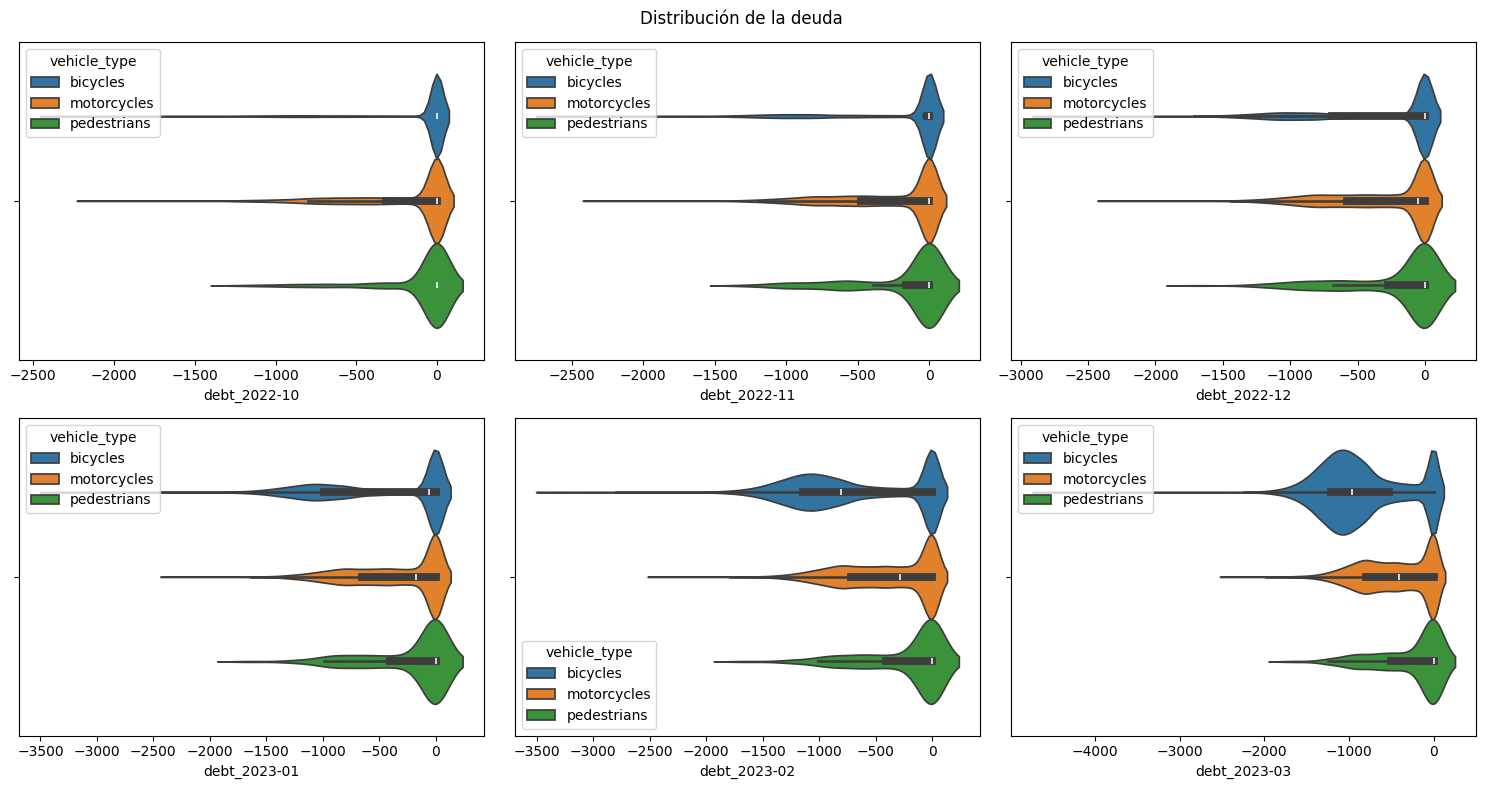

In [24]:
fig, axes = plt.subplots(2,3,figsize=(15, 8))
fig.suptitle('Distribución de la deuda')
a = 4
for i in range(2):
    for j in range(3):
        sns.violinplot(x=courier_debt.columns[a], data=courier_debt, hue='vehicle_type', ax=axes[i, j])
        axes[i,j].set_xlabel(courier_debt.columns[a])
        if a >=9:
            break
        else:
            a = a+1
plt.tight_layout()

Podemos observar que el aumento de deuda de motocicletas y peatones experimenta un ligero crecimiento, sin embargo, el que se sale de control son las bicicletas

#### Primera hipótesis: ¿Es posible que la deuda de bicicletas aumente por un existente aumento exponencial de riders bicicletas?

<Axes: xlabel='vehicle_type'>

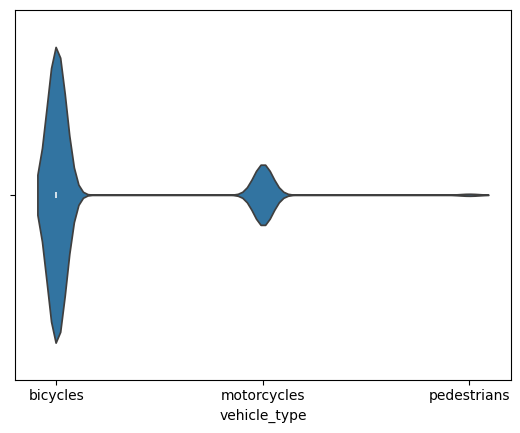

In [25]:
sns.violinplot(x=courier_debt['vehicle_type'],data=courier_debt)

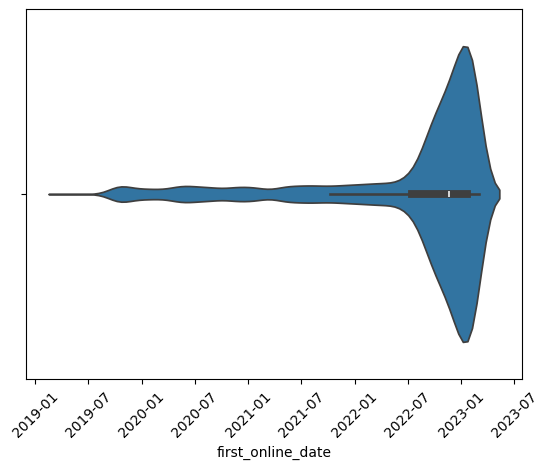

In [26]:
sns.violinplot(x=courier_debt['first_online_date'],data=courier_debt)
plt.xticks(rotation=45)
plt.show()

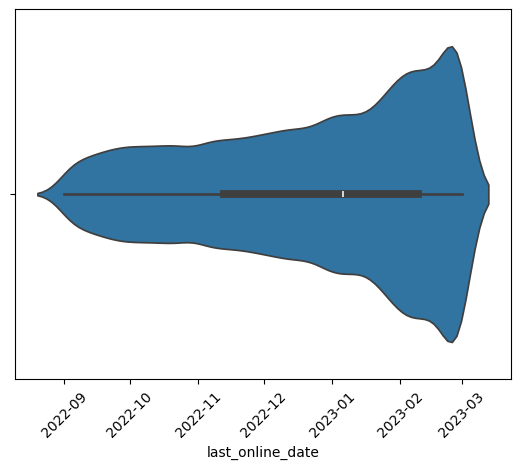

In [27]:
sns.violinplot(x=courier_debt['last_online_date'],data=courier_debt)
plt.xticks(rotation=45)
plt.show()

In [28]:
courier_debt[courier_debt['first_online_date']>='2022-07-01'].value_counts().sum()

38099

In [29]:
courier_debt[courier_debt['first_online_date']<'2022-07-01'].value_counts().sum()

12103

In [30]:
38099/50202

0.7589139874905382

#### **A partir de 07-2022, empieza el crecimiento de riders (representa el 75% del total), es decir, es probable que el aumento de riders definitivamente haya influenciado en el aumento de deuda**
Sin embargo, esto no resuelve el problema, no podemos dejar de contratar riders 

## Segunda hipótesis: ¿Es probable que existan riders que adrede acepten todos los pedidos de efectivo y eviten los de tarjeta?

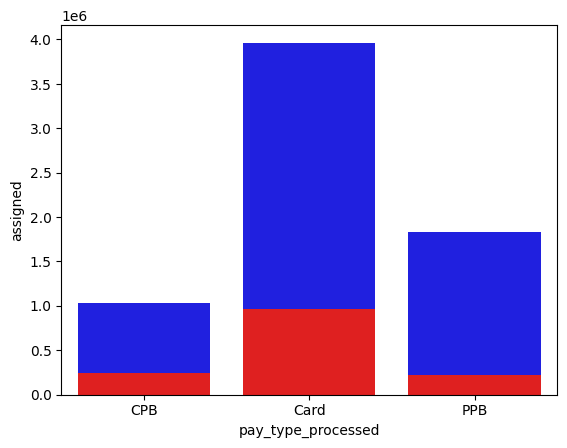

In [31]:
DF1=sqldf(''' SELECT pay_type_processed,sum(assigned) as assigned,sum(rejected) as rejected FROM assigned_order GROUP BY 1 ''')
ax = plt.subplots()
ax = sns.barplot(x=DF1["pay_type_processed"], y=DF1["assigned"], color='b')
ax = sns.barplot(x=DF1["pay_type_processed"], y=DF1["rejected"], color='r')
plt.show()

In [32]:
sqldf(''' SELECT * FROM DF1 ''')

,pay_type_processed,assigned,rejected
0,CPB,1027348,241989
1,Card,3964688,966867
2,PPB,1830218,222497


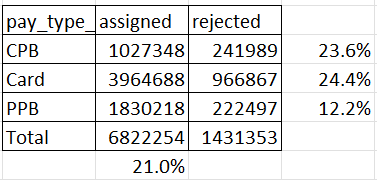

La mayoría de pedidos asignados son hechos con tarjeta. Luego, se rechaza casi la misma cantidad de pedidos en PPB y CPB, sin embargo, si analizamos la proporción que existe en cada tipo de pago, observamos que solo el 12.2% de del total de PPB se rechaza, mientras que en los otros tipos de pago, se mantiene un estándar de 23+%

¿Cuantos de estos pedidos asignados serán completados de acuerdo con el tipo de pago?

In [33]:
DF2=sqldf(''' 
          SELECT pay_type_processed,
                 sum(total_completed_orders_count) as total_completed_orders_count 
          FROM completed_order GROUP BY 1 ''')
DF2

,pay_type_processed,total_completed_orders_count
0,CPB,519833
1,Card,2122869
2,PPB,1202784


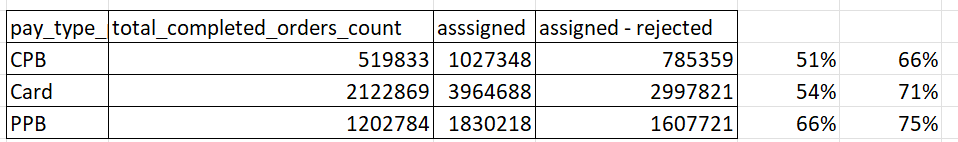

En proporción, PPB son las órdenes que más se completan, sin embargo, si analizamos los reales (asignados - rechazados) el ratio de completados es bastante estándar

Podemos concluir que los riders prefieren que les paguen todo el monto en efectivo (PPB) por elección propia

### Tercera hipótesis: ¿Es posible que esté relacionado el tiempo de trabajo y la deuda?

In [34]:
courier_debt.head()

,rider_id,first_online_date,vehicle_type,last_online_date,debt_2022-10,debt_2022-11,debt_2022-12,debt_2023-01,debt_2023-02,debt_2023-03
0,id_5764607523772434582,2020-08-08,bicycles,2023-03-01,-405.01,-412.28,-936.76,-1020.68,-593.89,-1088.69
1,id_5764607523789211641,2019-12-26,bicycles,2023-01-09,-486.95,-486.95,-486.95,-486.95,-456.50,-456.50
2,id_5764607523910846566,2019-09-28,motorcycles,2023-02-10,0.00,0.00,-196.31,-196.31,-196.31,-340.43
3,id_5764607524099591948,2019-11-04,bicycles,2022-12-06,-801.96,-541.49,-577.76,-254.77,-254.77,-254.77
4,id_5764607524409968722,2019-10-13,bicycles,2022-11-08,-583.36,0.00,0.00,0.00,0.00,0.00


In [35]:
courier_debt['diferencia_dias'] = (courier_debt['last_online_date'] - courier_debt['first_online_date']).dt.days.astype(int)

In [36]:
courier_debt[courier_debt['diferencia_dias']==3]

,rider_id,first_online_date,vehicle_type,last_online_date,debt_2022-10,debt_2022-11,debt_2022-12,debt_2023-01,debt_2023-02,debt_2023-03,diferencia_dias
1028,id_5764607729129754063,2022-09-08,bicycles,2022-09-11,0.0,0.00,0.00,0.00,0.00,0.00,3
1405,id_5764607818732669230,2022-08-31,motorcycles,2022-09-03,0.0,0.00,0.00,0.00,0.00,0.00,3
1482,id_5764607851779591400,2023-01-19,bicycles,2023-01-22,0.0,0.00,0.00,0.00,0.00,0.00,3
1533,id_5764607870846896223,2023-01-15,bicycles,2023-01-18,0.0,0.00,0.00,0.00,0.00,0.00,3
1986,id_5764608083246451684,2022-10-26,bicycles,2022-10-29,0.0,-698.31,-698.31,-698.31,-698.31,-698.31,3
...,...,...,...,...,...,...,...,...,...,...,...
50018,id_5764642657192117573,2023-02-25,motorcycles,2023-02-28,0.0,0.00,0.00,0.00,0.00,0.00,3
50040,id_5764642663877837359,2023-02-21,bicycles,2023-02-24,0.0,0.00,0.00,0.00,0.00,-1250.92,3
50062,id_5764642670798440369,2023-02-25,bicycles,2023-02-28,0.0,0.00,0.00,0.00,0.00,-1346.29,3
50074,id_5764642673558292473,2023-02-22,bicycles,2023-02-25,0.0,0.00,0.00,0.00,0.00,-1071.81,3


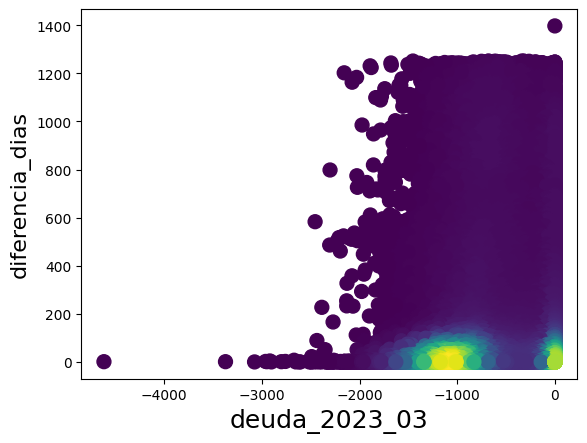

In [43]:
xy = np.vstack([courier_debt['debt_2023-03'],courier_debt['diferencia_dias']])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
ax.scatter(courier_debt['debt_2023-03'], courier_debt['diferencia_dias'], c=z, s=100)
plt.xlabel('deuda_2023_03', fontsize=18)
plt.ylabel('diferencia_dias', fontsize=16)
plt.show()

Al parecer la mayoría de riders con deudas se encuentran alrededor de los -1000 o 0 y son los que menos días de trabajo tienen. Además, las deudas más altas las tienen los riders que trabajan menos días

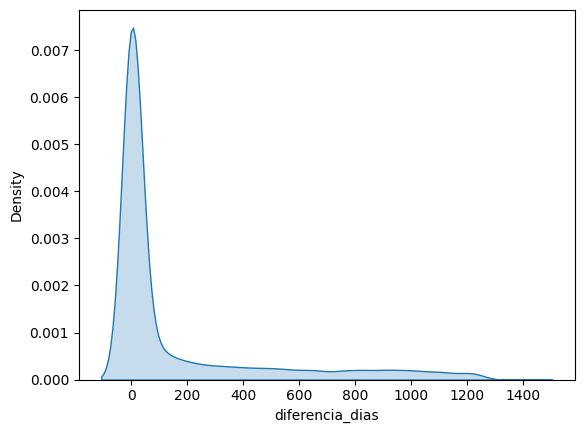

In [38]:
sns.kdeplot(data=courier_debt['diferencia_dias'],fill=True)
plt.show()

In [42]:
courier_debt[courier_debt['diferencia_dias']==0]['debt_2023-03'].sum()

-18257415.25

In [62]:
cuantiles = [0.5,1]
cuantiles = pd.qcut(courier_debt['diferencia_dias'], q=cuantiles)

cuantiles

0        (1.999, 1397.0]
1        (1.999, 1397.0]
2        (1.999, 1397.0]
3        (1.999, 1397.0]
4        (1.999, 1397.0]
              ...       
50197                NaN
50198                NaN
50199                NaN
50200                NaN
50201                NaN
Name: diferencia_dias, Length: 50202, dtype: category
Categories (1, interval[float64, right]): [(1.999, 1397.0]]